In [1]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("1.04.+Real-life+example.csv")
data.head()


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [4]:
#to include all variables put inside the describe function(include="all")

data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
#Registration Column not needed 
data = data.drop(["Registration"], axis=1)
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,2011,Rav 4


In [6]:
data = data.drop(["Model"], axis=1)

Dealing with missing values 

In [7]:
data.isna().sum()

Brand            0
Price          172
Body             0
Mileage          0
EngineV        150
Engine Type      0
Year             0
dtype: int64

In [8]:
#Rule of thumb: if you are removing <5% of the ovservations, you are free to just remove all that MV

data = data.dropna(axis=0)
data.isna().sum()

Brand          0
Price          0
Body           0
Mileage        0
EngineV        0
Engine Type    0
Year           0
dtype: int64

Exoloring the PDFs

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

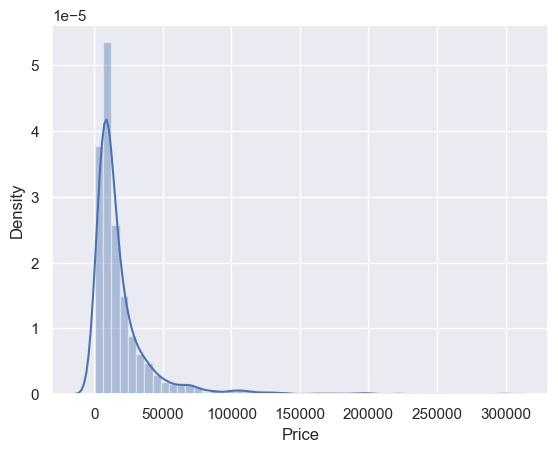

In [9]:
#TO display the PDF just use distplot of seaborn, and for optimal results expect a normal distribution 

sns.distplot(data["Price"])

#The price distribution is not normal and it is exponential, and this will be a problem for regression 

Dealing with outliers

In [10]:
#One way to deal with outliers seemlessly is to remove top 1% of observations(0.99 quantile)
q = data["Price"].quantile(0.99)
data = data[data["Price"] < q]
data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,880,NaN,1528,NaN,NaN,1853,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,2011.000000


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

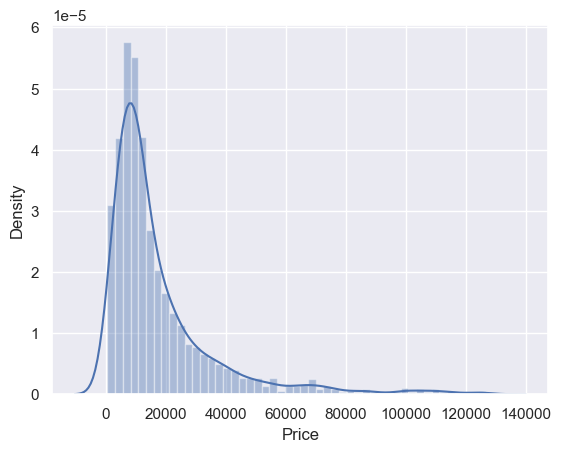

In [11]:
#The price coloumn will be distributed same way but with no outliers 
sns.distplot(data["Price"])

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

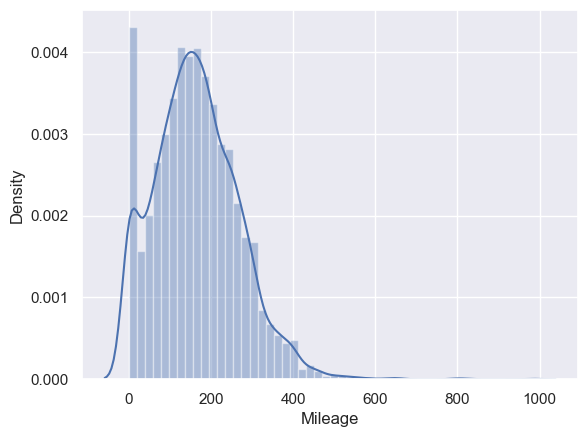

In [12]:
sns.distplot(data["Mileage"])

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

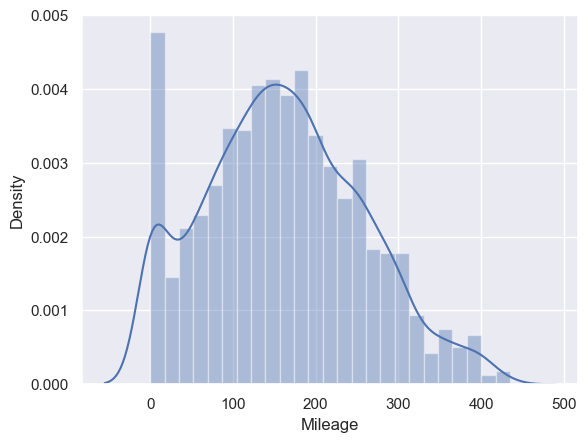

In [13]:
q = data["Mileage"].quantile(0.99)
data = data[data["Mileage"] < q]
sns.distplot(data["Mileage"])

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

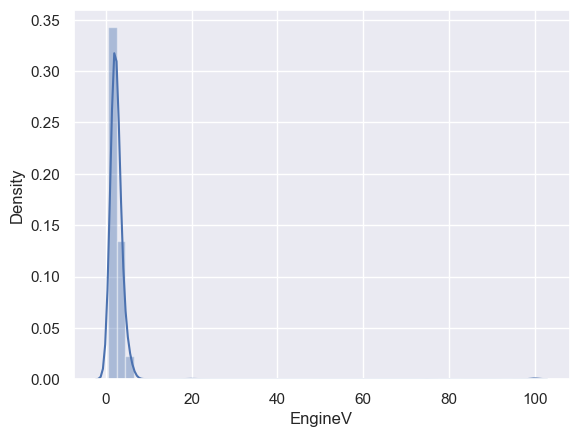

In [14]:
sns.distplot(data["EngineV"])

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

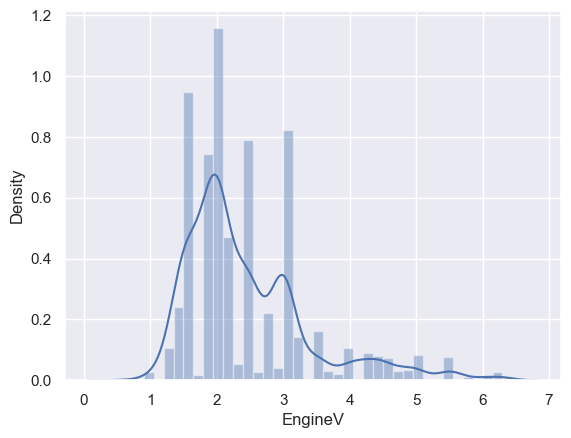

In [15]:
#Engine volume is between 0.6 to 6.5, and 99.99 is for nall values 

data = data[data["EngineV"] < 6.5]
sns.distplot(data["EngineV"])

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

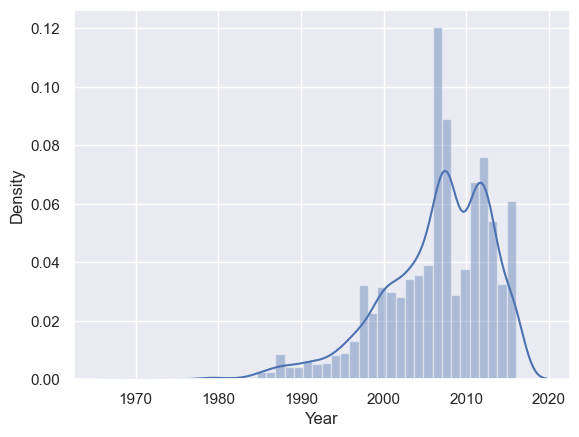

In [16]:
sns.distplot(data["Year"])

#Most cars are new so, takes the news one 

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

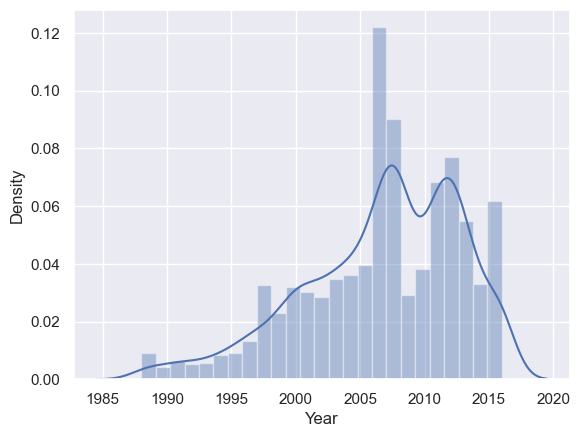

In [17]:
q = data["Year"].quantile(0.01)
data = data[data["Year"] > q]
sns.distplot(data["Year"])

In [18]:
# make a new data variable and reset indext to ignore all old bad values 

data_cleaned = data.reset_index(drop=True)
data_cleaned.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,NaN
freq,848,NaN,1467,NaN,NaN,1807,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,2012.000000


Overall ~ 250 observations got deleted 

# Checking the OLS assumptions 

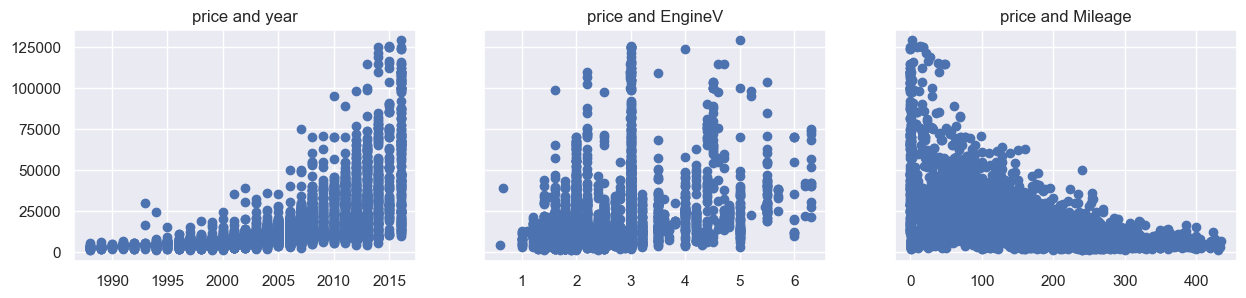

In [19]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))

ax1.scatter(data_cleaned["Year"], data_cleaned["Price"])
ax1.set_title("price and year")

ax2.scatter(data_cleaned["EngineV"], data_cleaned["Price"])
ax2.set_title("price and EngineV")

ax3.scatter(data_cleaned["Mileage"], data_cleaned["Price"])
ax3.set_title("price and Mileage")

plt.show()

#There is a relationship but its not a linear, so a linear regression on this dataset wont be any good 

Relaxing the assumptions

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Log_price', ylabel='Density'>

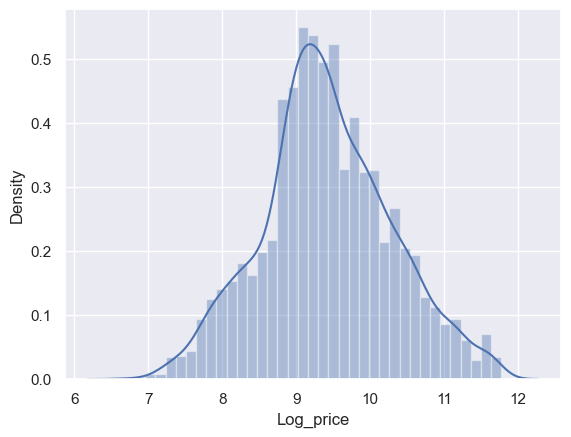

In [20]:
#To make linear fit into the data transform one or more variabels (log transform), start with the dependent 
log_price = np.log(data_cleaned["Price"])
data_cleaned["Log_price"] = log_price
sns.distplot(data_cleaned["Log_price"])

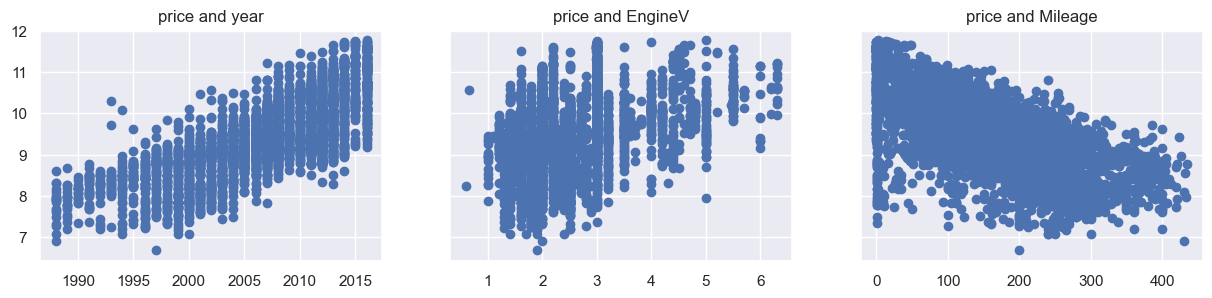

In [21]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))

ax1.scatter(data_cleaned["Year"], data_cleaned["Log_price"])
ax1.set_title("price and year")

ax2.scatter(data_cleaned["EngineV"], data_cleaned["Log_price"])
ax2.set_title("price and EngineV")

ax3.scatter(data_cleaned["Mileage"], data_cleaned["Log_price"])
ax3.set_title("price and Mileage")

plt.show()

#Now it much more linear 

In [22]:
#Drop the old price 
data_cleaned = data_cleaned.drop(["Price"], axis=1)

#Usally deal with the no endogeneity assumption and there is a test for it and test it after regression
#Normality and Homoscedasticity (normality, zero mean, homoscedasticity and the reason for that is the log transofrm)
#No Autocorrleation its not a times series data type so the variables are not depend on each other

# Multicollinearity

Is independent variables correlated with each other?

One of the best ways to check for multicollinearity is through VIF(Variance Inflation Factor)

VIF is a measure estimates how much larger the square root of the standard error of an estimate is combared to a situation where the variable was completely uncorrelated with the otehr predictors.


In [23]:
#It is logical that "Year" and "Mileage" will be correlated

from statsmodels.stats.outliers_influence import variance_inflation_factor

# put all continues variables
variabels = data_cleaned[["Mileage", "Year", "EngineV"]]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variabels.values, i) for i in range(variabels.shape[1])]
vif["features"] = variabels.columns  
vif
#To solve multicollinearity 3 things you can do:1- drop one of them,2- transform both into new variable
#3- keep them and take care of them 

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [24]:
#Seems that year is correlated with all variables so it needs to be droped 

data_cleaned = data_cleaned.drop(["Year"], axis=1) 

## creat dummy variables

creat N-1 dummies to prevent multicollinearity 

In [25]:
#Make dummies 

data_cleaned = pd.get_dummies(data_cleaned, drop_first=True)

data_cleaned

,Mileage,EngineV,Log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3863,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3864,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3865,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [26]:
data_cleaned.columns

Index(['Mileage', 'EngineV', 'Log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol'],
      dtype='object')

In [27]:
#VIF without the log_price 

variabels2 = data_cleaned.drop(["Log_price"], axis=1)
vif2 = pd.DataFrame()
vif2["VIF"] = [variance_inflation_factor(variabels2.values, i) for i in range(variabels2.shape[1])]
vif2["features"] = variabels2.columns  
vif2

#"EngineV" is the only one higher but cause it affectes the other varibales but its important 

,VIF,features
0,4.419925,Mileage
1,6.215019,EngineV
2,2.173765,Brand_BMW
3,2.674018,Brand_Mercedes-Benz
4,1.466501,Brand_Mitsubishi
5,1.795902,Brand_Renault
6,1.943698,Brand_Toyota
7,2.427961,Brand_Volkswagen
8,1.434468,Body_hatch
9,1.494911,Body_other


Now lets calculate the VIFs for a data frame where include the dummies, without 'log_price', but no dropping the first dummy 

In [28]:
data_with_dummies_new = pd.get_dummies(data)

variables3 = data_with_dummies_new.drop(["Price"],axis=1)
vif3 = pd.DataFrame()
vif3["VIF"] = [variance_inflation_factor(variables3.values, i) for i in range(variables3.shape[1])]
vif3["features"] = variables3.columns
vif3


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,features
0,2.417541,Mileage
1,1.573965,EngineV
2,2.385864,Year
3,inf,Brand_Audi
4,inf,Brand_BMW
5,inf,Brand_Mercedes-Benz
6,inf,Brand_Mitsubishi
7,inf,Brand_Renault
8,inf,Brand_Toyota
9,inf,Brand_Volkswagen


The result that we get is that very interesting indeed. Most VIFs are equal to **inf**, or plus infinity. 

We even got an warning: *RuntimeWarning: divide by zero encountered in double_scalars, vif = 1. / (1. - r_squared_i)*

The main reason is: When a car is an 'Audi' all other brand dummies are 0. When a car is not 'Audi', at least one of them will be 1. By including all dummies have introduced multicollinearity (**perfect multicollinearity**)!!! 

If a regression made including all these dummies, the coefficients would be inflated and completely off-mark. 

that's why first dummy was dropped 

### Declare the dependet and independent variables 

In [33]:
x = data_cleaned.drop(["Log_price"], axis=1)
y = data_cleaned["Log_price"]

### Standardization

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled 

array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.41493781,
        -0.16209221,  1.33267512],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.41493781,
        -0.16209221, -0.75037043],
       [ 2.06500263,  2.68588629, -0.43865069, ...,  2.40999971,
        -0.16209221, -0.75037043],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.41493781,
        -0.16209221, -0.75037043],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.41493781,
        -0.16209221,  1.33267512],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.41493781,
        -0.16209221, -0.75037043]])

### Train Test Split

In [53]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=365)


### Create Regression

In [54]:
reg = LinearRegression()
reg.fit(x_train, y_train)

#Note its not linear regression and it is a log regression due to the log transform on the price

LinearRegression()

In [55]:
#The prediect y_hat

y_hat = reg.predict(x_train)

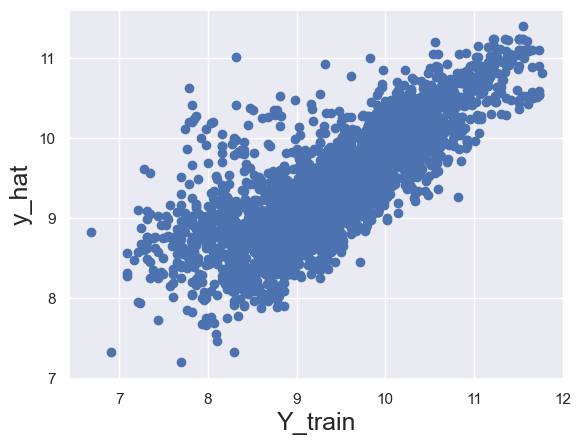

In [56]:
#Plotting the distarbation of both y_train and y_hat
plt.scatter(y_train, y_hat)
plt.xlabel("Y_train", size=18)
plt.ylabel("y_hat", size=18)
plt.show()

seems the model is not perfect but doing so good as you can see that if there a line from 0s it wont be perfect on the dataset 

### Residuals

Residuals are the differences between the dependent and the independents variables, refers to the distribution of the residuals

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

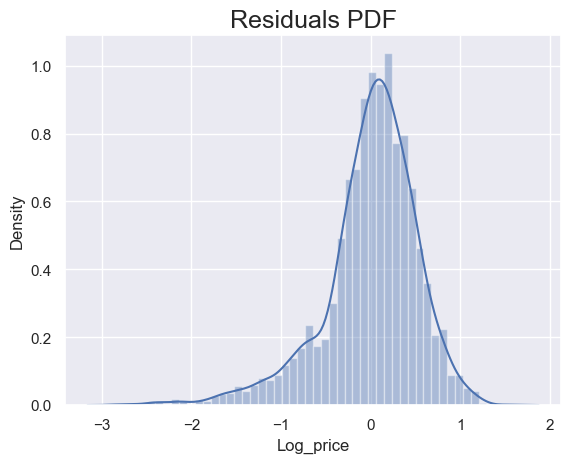

In [57]:
sns.distplot(y_train -  y_hat)
plt.title("Residuals PDF", size = 18)

It is normal with meab of zero as the asumptions of OLS.

The main problem here will be the left long tail of the distrbution, therfore there are certain observatuions for which y_trai minus y_hat is much lower than the mean.(much higehr price is predicted than the actual price).(overestimate the targets)

On the right side the predictions rarely underestimate the targets.

### The R_squard

In [58]:
reg.score(x_train, y_train)

0.6327932829432332

The model explains 63% of the variablilty of the data, it can be better.

### Finding the Weighrs and Bias

In [59]:
reg.intercept_

9.416736021792213

In [60]:
#Making summary table to be able to read the coef

reg_summary = pd.DataFrame(x.columns.values, columns=["Features"])
reg_summary["Weights"] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.515335
1,EngineV,0.219670
2,Brand_BMW,0.021932
3,Brand_Mercedes-Benz,0.056136
4,Brand_Mitsubishi,-0.113895
5,Brand_Renault,-0.130058
6,Brand_Toyota,-0.021693
7,Brand_Volkswagen,-0.041895
8,Body_hatch,-0.169471
9,Body_other,-0.100725


### Testing 

In [67]:
y_hat_test = reg.predict(x_test)

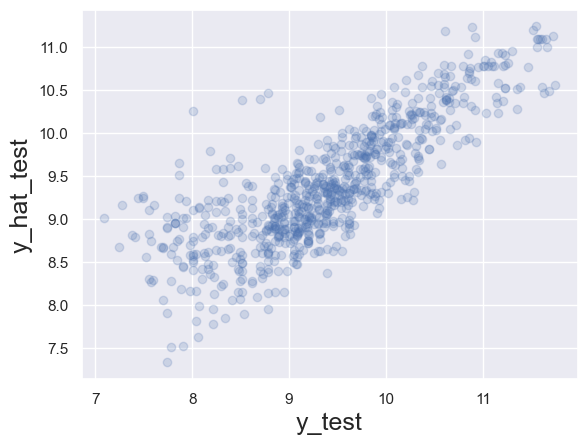

In [69]:
#Plotting the distarbation of both y_test and y_hat_test

plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel("y_test", size=18)
plt.ylabel("y_hat_test", size=18)
plt.show()

#The alpha argument will show saturated color, the more saturated, the higher concentration

The model can predict higher price well but not so good at lower price, as it showes that the lower price more distrbutied 

### Manually explore the algorithm came up with 

This will help on how to make the model better 

In [70]:
#Create a new data frame that will contains the predictions 
#Note that it is a log_price not the actual price so need to chage back with exonatial

data_perforamance = pd.DataFrame(np.exp(y_hat_test), columns=["Preidction"]) # np.exo to transform back the price
data_perforamance.head()

,Preidction
0,8290.962337
1,10030.951704
2,7728.513416
3,7106.617356
4,8946.423009


In [72]:
#Put the y_test beside them and check the Residual(differance between both of them)
#Don't forget to rest inedx cause when train test split happened the orgianl indeces were preserevd
#If y_test was putting wihout reseting pandas will try to match the index of two frams and will lead to missing values

y_test = y_test.reset_index(drop=True)
data_perforamance["Target"] = np.exp(y_test)
data_perforamance


,Preidction,Target
0,8290.962337,2300.0
1,10030.951704,2800.0
2,7728.513416,2500.0
3,7106.617356,6400.0
4,8946.423009,9150.0
...,...,...
769,26268.588614,29500.0
770,10780.764943,9600.0
771,13713.032196,18300.0
772,33687.384652,68500.0


In [74]:
#Make new column with the differences 

data_perforamance["Residual"] =  data_perforamance["Target"] - data_perforamance["Preidction"]
data_perforamance["Differences%"] = np.absolute(data_perforamance["Residual"] / data_perforamance["Target"] * 100)

# the lower the differance the better the model, the goal is to make a model with least Residual value

In [75]:
#Descrabtive of the new data fram 

data_perforamance.describe()

,Preidction,Target,Residual,Differences%
count,774.000000,774.000000,774.000000,774.000000
mean,15560.322365,18165.817106,2605.494741,48.389560
std,12785.178475,19967.858908,11277.429072,79.150473
min,1534.536742,1200.000000,-31976.552299,0.099578
25%,7364.900478,6900.000000,-2340.797923,13.241638
50%,10989.862225,11600.000000,638.119126,27.328555
75%,19119.870780,20500.000000,3916.897156,48.155373
max,76166.153837,126000.000000,87273.596622,854.045645


The min differences shows that the model was good and the output spot on.

The max however is pretty off mark.

The precentiles shows that the model predictions was relatively close.

In [78]:
#Visting the data manually and sort it wiht diffeneces%
#To show all raws of the data set.
pd.options.display.max_rows = 999
pd.set_option("display.float_format", lambda x: "%.2f" % x)
data_perforamance.sort_values(by=["Differences%"])

,Preidction,Target,Residual,Differences%
258,11888.15,11900.00,11.85,0.10
23,12913.98,12900.00,-13.98,0.11
165,9389.32,9400.00,10.68,0.11
508,14953.31,15000.00,46.69,0.31
261,48364.18,48535.50,171.32,0.35
270,7728.32,7700.00,-28.32,0.37
438,17094.06,16999.00,-95.06,0.56
484,11667.91,11600.00,-67.91,0.59
446,8958.69,8900.00,-58.69,0.66
31,12748.39,12650.00,-98.39,0.78


After looking to observed data that has bigger Residual, all of them are extreamey low price as it was in the distrbuated plot

On average the model is pretty decent at predicting the price, except for the lower price, the sign of them is negatice so it leads that their predictions are higher than the targets. 

So, 1 - Maybe the model missing an important factor it can be the Model that it was dropped first.

2 - Remove a bigger part of the outliers.

3 - Use different kind of transformations
